<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/actuaria/estadistica_multi/tarea_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1 
<b> Crear una función propia de la desviación estandar. </b>

## $ \sigma = [\frac{1}{N}\sum_{i = 1}^{N}{(a_{i} - \bar{a})^2}]^{1/2}   $

In [18]:
import numpy as np
import pandas as pd 

# Función para calcular la desviación estandar
def desv(x):
  suma = 0  # contador donde se almacenara todas las operaciones que recorra el ciclo for 

  x_bar = np.mean(x) # calcula primero la media del arreglo 
  for i in x:        # ciclo for para sumar los cuadrados de las operaciones hasta el ultimo dato dentro del arreglo 
    suma += (i - x_bar)**2   #  el cuadrado de la resta entre cada i (variable que recorre el ciclo for) y la media 
  div = suma/(len(x)- 1 )     
  raiz = div**(1/2)      # sacamos la raiz 
  return raiz 


a = [3,5,6,4,7,1,6,8,3,5,6,1,7,8,9]

print('Desviación estandar usando numpy: \t{:.3f} '.format(np.std(a)))
print('\n')
print('Desviación estandar usando mi función: \t{:.3f} '.format(desv(a)))

Desviación estandar usando numpy: 	2.380 


Desviación estandar usando mi función: 	2.463 


## Ejercicio 2
<b> . Supongamos que se tienen 4 puntos de datos {x1, x2, x3, x4}, $ xi ∈ R^3$, representados con la
matriz.  </b>



\begin{bmatrix}
4 & 3 & 2 \\
2 & 1 & -2 \\
 4 &  -1 & 2 \\
-2 & 1 & 2
\end{bmatrix}



-  <b>a) Realiza un PCA de los datos X, esto es, encuentra los componentes principales y sus varianzas
asociadas en el sistema coordenado.</b>

-  <b> b)Proyecta los datos en dos dimensiones ¿Qu´e fracci´on de la varianza de X se preserva?
  </b>

In [19]:
import numpy as np

L = np.array([4, 3, 2, 2, 1, -2, 4, -1, 2, -2, 1,2 ]).reshape(3,4)
L

array([[ 4,  3,  2,  2],
       [ 1, -2,  4, -1],
       [ 2, -2,  1,  2]])

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


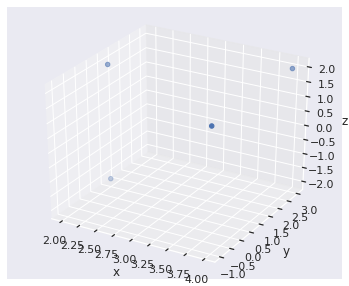

In [20]:
from matplotlib.cbook import sanitize_sequence
import seaborn as sns 
import matplotlib.pyplot as plt 

x = np.array([4,2, 4, 2])
y = np.array([3,1,-1,1])
z = np.array([2,-2,2,2])

sns.set_style("darkgrid")
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x, y, z)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd 
datos = [[4, 3, 2],
         [2, 1, -2],
         [4, -1, 2],
         [-2 ,1, 2]]
columnas = ['x', 'y','z'] # definimos los nombres de las columnas

arreglo = pd.DataFrame(datos, columns = columnas)


# Cramos un objeto scaler y aplicamos estandarización a nuestros datos
scaler = StandardScaler()
arreglo_std = scaler.fit_transform(arreglo)

# Cremos un objeto PCA y ajustamos a los datos 
pca = PCA()
pca_objeto = pca.fit_transform(arreglo_std)
pca_arreglo = pd.DataFrame(pca_objeto, columns = ['PC_1', 'PC_2', 'PC_3']) 
print(arreglo)
print('\n')
print(arreglo_std)
print('\n')
print(pca_arreglo)


   x  y  z
0  4  3  2
1  2  1 -2
2  4 -1  2
3 -2  1  2


[[ 0.81649658  1.41421356  0.57735027]
 [ 0.          0.         -1.73205081]
 [ 0.81649658 -1.41421356  0.57735027]
 [-1.63299316  0.          0.57735027]]


       PC_1      PC_2      PC_3
0 -0.816497  0.116058  1.523110
1  0.000000  1.549193 -0.774597
2 -0.816497 -1.148853 -1.006712
3  1.632993 -0.516398  0.258199


In [22]:
print(pca.explained_variance_ratio_)

[0.33333333 0.33333333 0.33333333]


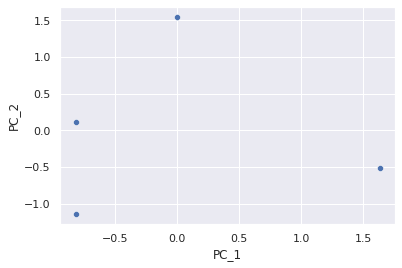

In [23]:
sns.scatterplot(x = pca_arreglo['PC_1'], y = pca_arreglo['PC_2'])
plt.show()

## Ejercicio 3 

<b>  Genera una muestra aleatoria de tamaño n = 100 a partir de una distribución normal 3-
dimensional, en donde una de las variables tenga una varianza muy grande. Realiza un PCA usando la
matriz de correlación. Además, encuentra los eigenvalores, dibuja la gráfica scree y comenta tus resultados  </b>

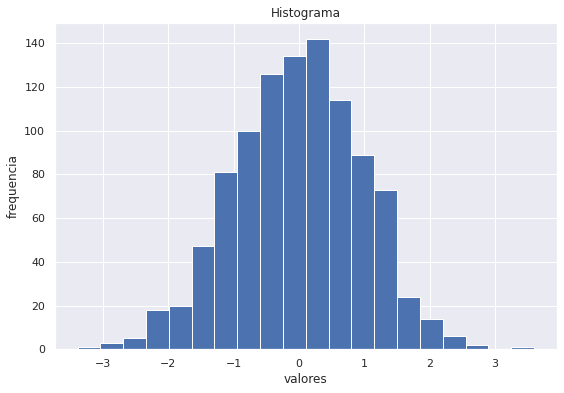

In [24]:
# Generamos una muestra
mu, sigma = 0, 1 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos 

# Graficamos
# histograma de distribución normal.
import seaborn as sns
sns.set()
plt.figure(figsize =(9,6))
plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()


In [25]:
binomial = pd.DataFrame()
muestreo_binom = np.random.normal(1, 0.7, 100) 
binomial = muestreo_binom
binomia = pd.DataFrame(binomial, columns = ['Muestreo 1'])

import random as random
mues_aleato = random.sample(list(binomial),100) # generamos una muestra aleatoria de n:100 de la distr. normal 
muest = np.array(mues_aleato)
Y = muest.reshape(20,5)   
media = Y - np.mean(Y, axis = 0)             # centramos la media 
matriz_cov = np.cov(media, rowvar = False) # matriz de covarianza 
eigen_val, eigen_vec = np.linalg.eigh(matriz_cov)     # eigenvalores y eigenvectores

eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]    # reinscribimos eigenvectores y eigenvalores de froma decreciente 
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]
n_components = 2 
eigenvector_2 = eigen_vec[:,0:n_components]  

# Varianza explicada de un 
eigen_val_total = sum(eigen_val)
varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]
varianza_explicada = np.round(varianza_explicada, 2)
varianza_explicada_acumulada = np.cumsum(varianza_explicada)
print("Varianza explicada: {}".format(varianza_explicada))
print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))


Varianza explicada: [33.97 22.94 19.35 14.99  8.74]
Varianza explicada acumulada: [33.97 56.91 76.26 91.25 99.99]


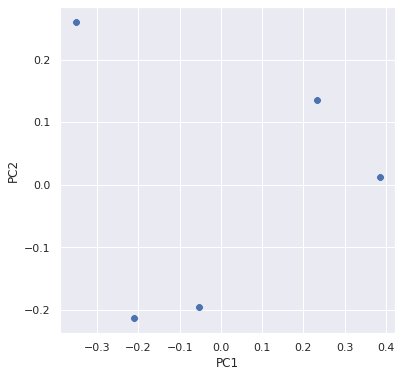

In [26]:
# Escribimos lo anterior como función 
def PCA(X , num_componentes):
    X_media = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_media , rowvar = False) 
    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index] 
    eigenvector_ = sorted_eigenvec[:,0:num_componentes] 
    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose() 
    return X_red


pca = PCA(matriz_cov,5)
# Tabla que muestra a las dos componentes principales
principal_df = pd.DataFrame(pca, columns = ['PC1','PC2', 'PC3', 'PC4' ,'PC5'])
plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2'  , s = 60 , palette= 'icefire')

## Ejercicio 4 
<b>  Calcula las varianzas empíricas de las componentes principales y realiza un scree </b>

   precip. Julio  Temp. med. Julio  Velo. med. viento Julio  Precip. sept.
0          20.25              20.8                    26.73          32.22


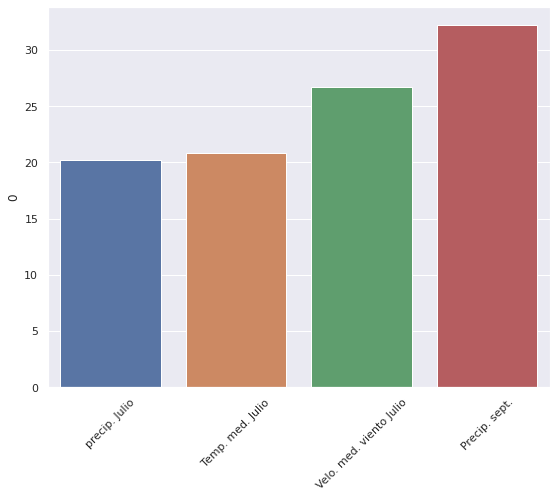

In [27]:
z = np.array([140.017, 107.881, 139.068, 109.095,
               0     , 106.038, 110.0439, 82.627,
               0    , 0      , 168.752 , 125.136,
               0     , 0      ,  0      , 108.960])
z = z.reshape(4,4)
# Ya que tenemos la matriz de covarianza, calculamos los eigenvalores
eigen_val, eigen_vec = np.linalg.eigh(z)
eigen_val_total = sum(eigen_val)  # suma total de eigenvalores
varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]
varianza_explicada = np.round(varianza_explicada, 2)
#print("Varianza explicada: {}".format(varianza_explicada))
#columns = ['precip. Julio', 'Temp. med. Julio', 'Velo. med. viento Julio', 'Precip. sept.']
df = pd.DataFrame(varianza_explicada)
df = df.transpose()
df_clima = df.columns = ['precip. Julio', 'Temp. med. Julio', 'Velo. med. viento Julio', 'Precip. sept.']
print(df)
#GRAFICANDO 
sns.set()
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.columns, y = df.iloc[0])
plt.xticks(rotation=45)
plt.show()


## Ejercicio 5 
<b> Tortugas   </b>
  - . En el archivo tortugas.txt Hay tres variables, largo, ancho y alto,
de los caparazones de 48 tortugas pintadas, 24 hembras y 24 machos.

#### a)
<b> Tome logaritmos de las tres variables.
Estime el vector medio y la matriz de covarianza del macho. tortugas y de las tortugas hembra por separado.
Encuentre los valores propios y los vectores propios de cada matriz de covarianza estimada y lleve a cabo
un PCA de cada conjunto de datos </b>

In [28]:
# Tratamiento de datos
df_tortuga = pd.read_csv('https://web.stanford.edu/class/bios221/data/PaintedTurtles.txt')
df_tortuga.columns = ['titulo']
df_tortuga[['sex','length', 'width', 'height']]=df_tortuga.titulo.str.split('\t',expand=True)
df_tortuga = df_tortuga.drop(['titulo'],axis = 1)
#df_tortuga.head()
#DataFrame listo para usar 

df_categ = df_tortuga['sex']  # separo variables categoricas y numericas
df_nume = df_tortuga.drop(['sex'],axis = 1)

# Cramos un objeto scaler y aplicamos estandarización a nuestros datos
scaler = StandardScaler()
arreglo_std = scaler.fit_transform(df_nume)

df_nume_scale = pd.DataFrame(arreglo_std, columns = ['length', 'width', 'height']) # el arreglo lo pasamos a DF
# concatenamos los DataFrame
df_listo = pd.concat([df_categ, df_nume_scale], axis = 1)
df_listo.head()

,sex,length,width,height
0,f,-1.316787,-1.151031,-1.003417
1,f,-1.070083,-0.911856,-1.003417
2,f,-1.070083,-0.752406,-0.521777
3,f,-0.971401,-0.752406,-0.762597
4,f,-0.774037,-0.592955,-0.280957


In [59]:
# obtenemos la media del largo, ancho y peso de la tortuga macho y hembra
tortugas_medidas = df_listo.groupby('sex')[['length'	,'width','height']].mean()
# Ahora sacamos la media de cada feature de cada sexo 
#M
tortugas_m = df_listo[df_listo['sex'] == 'm ']
m = tortugas_m.drop(['sex'], axis = 1)
arreglo_m = np.array(m)
media_m_centrada = arreglo_m -  np.mean(arreglo_m, axis = 0)
#F
tortugas_f = df_listo[df_listo['sex'] == 'f ']
f = tortugas_f.drop(['sex'], axis = 1)
arreglo_f = np.array(f)
media_f_centrada = arreglo_f -  np.mean(arreglo_f, axis = 0)


# sacamos la matriz de covarianza de cada genero 
cov_m = np.cov(media_m_centrada, rowvar = False)
print(cov_m)
print('\n')
cov_f = np.cov(media_f_centrada, rowvar = False)
print(cov_f)


[[0.33783105 0.31134064 0.22205056]
 [0.31134064 0.31806934 0.20787188]
 [0.22205056 0.20787188 0.16324047]]


[[1.09892672 1.06672064 1.00224651]
 [1.06672064 1.09154331 0.99151741]
 [1.00224651 0.99151741 0.9663363 ]]


In [71]:
# Manipulación de pandas, para usar el PCA()
df_f  = df_tortuga[df_tortuga['sex'] == 'f ']
df_m  = df_tortuga[df_tortuga['sex'] == 'm ']
df_f_1 = df_f.drop(['sex'],axis = 1)
df_m_1 = df_m.drop(['sex'], axis = 1)

In [72]:
# Calculo eigenvalores y eigenvectores de la matriz de los machos y hembras
#M
eigen_val_m, eigen_vec_m = np.linalg.eigh(cov_m)
#F
eigen_val_f, eigen_vec_f = np.linalg.eigh(cov_f)
# Utilizando PCA() de la biblioteca de sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
# Estandarizamos nustros dos set
scaler = StandardScaler()
scaler_m =  scaler.fit_transform(df_m_1)
scaler_f =  scaler.fit_transform(df_f_1)
#aplicamos pca() a nuestros set de datos 
pca = PCA() #
pca_m = pca.fit(scaler_m)
pca_f = pca.fit(scaler_f)

# porcentaje de varianza explicada por componente
print('Componentes del set de machos : ', pca_m.explained_variance_ratio_) 
print('\n')
print('Componentes del set de Hembras : ', pca_f.explained_variance_ratio_) 

Componentes del set de machos :  [0.98043958 0.01154736 0.00801306]


Componentes del set de Hembras :  [0.98043958 0.01154736 0.00801306]


### b)
<b>  Encuentre una expresi´on para el volumen del caparaz´on de una tortuga
para machos y hembras. (Sugerencia: use el hecho de que las variables son logaritmos de las medidas
originales.) Comparar vol´umenes de caparazones masculinos y femeninos. </b>